참고 https://www.youtube.com/watch?v=mJTrQfzr0R4

몬테 카를로 시각화 https://patrickstar-jjh.tistory.com/m/14

강화학습 포트폴리오 https://github.com/ZhengyaoJiang/PGPortfolio/blob/master/user_guide.md

포트폴리오 깔끔히 정리된 시각화 https://www.portfoliovisualizer.com/efficient-frontier#analysisResults



In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import numpy as np

In [3]:
df=yf.download(['AAPL','MSFT','TSLA'], start="2020-12-01", end="2021-12-29")

[*********************100%***********************]  3 of 3 completed


In [4]:
df = np.log(1 + df['Adj Close'].pct_change()) # 로그 정규화 정규분포에 가깝에 표준화를 시켜줌

In [5]:
df

,AAPL,MSFT,TSLA
Date,,,
2020-12-01,NaN,NaN,NaN
2020-12-02,0.002929,-0.003893,-0.027637
2020-12-03,-0.001138,-0.005261,0.042271
2020-12-04,-0.005628,0.000560,0.009493
2020-12-07,0.012195,-0.000327,0.068886
...,...,...,...
2021-12-21,0.018907,0.022807,0.041987
2021-12-22,0.015203,0.017896,0.072271
2021-12-23,0.003637,0.004462,0.056020


Portfolioreturn = 가중치1 * 애플주식의 수익률 + 가중치2 * 마이크로소프트주식의 수익률

In [6]:
weights =[0.5,0.5]

In [7]:
weights[0]*df.AAPL.mean() + weights[1]*df.MSFT.mean()

0.0015739955809199074

In [8]:
np.dot(df.mean(), weights) # 대량의 계산을 하기 위해서 numpy를 사용

ValueError: ignored

In [9]:
def portfolioreturn(weights):
  return(np.dot(df.mean(), weights))

In [10]:
portfolioreturn(weights)

ValueError: ignored

Portfoliovariance 
= (가중치1) * 애플주식의위험 + (가중치2) * 마이크로소프트주식의 위험 + 2 * (가중치1) * (가중치2) * 애플, 마이크로포스트주식간의 공분산

In [11]:
df.cov()

,AAPL,MSFT,TSLA
AAPL,0.000255,0.000138,0.000225
MSFT,0.000138,0.000171,0.000162
TSLA,0.000225,0.000162,0.001199


In [12]:
## 이미 cov에서 공분산이 구해졌기때문에 곱할 필요없음 어차피 AAPL/AAPL의 공분산은 위험의2과 같이 때문에 

In [13]:
pv = weights[0]**2*df.cov().iloc[0,0] + weights[1]**2*df.cov().iloc[1,1]+2*weights[0]*weights[1]*df.cov().iloc[0,1] # pv= portfoliovariance

In [14]:
pv**(1/2)**np.sqrt(250) # 표준편차 standard deviation

0.9998496027795578

In [15]:
#portfoliostd = portfoliostandard deviation
def portfoliostd(weights):
  return(np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(250) # 1년치 daily traing date를 곱해줌 

In [16]:
def weightscreator(df):
  random = np.random.random(len(df.columns)) #데이터 프레임의 수에 맞는 난수형성
  random /= random.sum()
  return random

In [17]:
weightscreator(df)

array([0.36372425, 0.40616654, 0.23010921])

In [18]:
returns = []
stds =[]
w=[]

for i in range(500):
  weights = weightscreator(df)
  returns.append(portfolioreturn(weights))
  stds.append(portfoliostd(weights))
  w.append(weights)

In [19]:
returns

[0.0016638741083066534,
 0.0016549462877545444,
 0.002029985441340676,
 0.0016614698511869365,
 0.0017873094334967755,
 0.0018676244744240704,
 0.0019173074862745183,
 0.0019867644253533235,
 0.001746753251709957,
 0.0016248335918254738,
 0.0017621882935933428,
 0.00170536534872099,
 0.0017528116585553935,
 0.0017807854532181542,
 0.0017302740190443377,
 0.001860314654502095,
 0.0018594129108669094,
 0.0020636508012266516,
 0.0018917351154901954,
 0.0018492961153891913,
 0.0017864971505191255,
 0.0017417469198035159,
 0.0018450141077957108,
 0.001893031148243714,
 0.0019193237209716896,
 0.0017622324190577662,
 0.00178639971597281,
 0.0018164245123950759,
 0.0018125450823927183,
 0.0018640309069658792,
 0.0018049872519451207,
 0.0018285943608738137,
 0.0017977136192946987,
 0.0017552975026818374,
 0.0020862778584250096,
 0.0018956931035755365,
 0.0015237667454999393,
 0.0018414636773967142,
 0.002051319536566149,
 0.001872023938069718,
 0.0016759142356219468,
 0.0017732739284347307,
 0

In [20]:
stds

[0.2255587844467839,
 0.21091126864785603,
 0.3572613989867013,
 0.20731541234247655,
 0.2571898003641901,
 0.2547420311785474,
 0.3189753630914514,
 0.39235491834264336,
 0.2618400019906538,
 0.22018082058423932,
 0.25196484890713844,
 0.20453401156584033,
 0.2501343814345345,
 0.26562837847863274,
 0.22557049343928853,
 0.28235785929268803,
 0.32088366907176435,
 0.3915689808707551,
 0.3048857052567785,
 0.27262828504621156,
 0.30255994035136785,
 0.24077922089870948,
 0.2834258758304079,
 0.25629586062632903,
 0.3239770370600351,
 0.2698010491027329,
 0.2632589561637432,
 0.2709838693351157,
 0.23766103482783268,
 0.29012385379263533,
 0.28942750824845376,
 0.28180106919487924,
 0.2588143687863606,
 0.30559599234436874,
 0.4049436710929786,
 0.29402137492316005,
 0.22238659100999744,
 0.27488210450919437,
 0.3717129890039918,
 0.2614117102231534,
 0.20411080517941904,
 0.23030688152278211,
 0.29110949912910034,
 0.3012686424956958,
 0.24156073401279157,
 0.3179216950292309,
 0.33121

In [21]:
w

[array([0.46981664, 0.39054974, 0.13963362]),
 array([0.37843215, 0.54369502, 0.07787283]),
 array([0.08245418, 0.34329441, 0.5742514 ]),
 array([0.32465566, 0.61351172, 0.06183262]),
 array([0.33807469, 0.37633859, 0.28558672]),
 array([0.09136956, 0.60976266, 0.29886779]),
 array([0.25457554, 0.27809174, 0.46733272]),
 array([0.34480168, 0.02234146, 0.63285685]),
 array([0.46374254, 0.25682377, 0.2794337 ]),
 array([0.51513677, 0.38953887, 0.09532436]),
 array([0.37801235, 0.35944456, 0.26254309]),
 array([0.15177087, 0.79844491, 0.04978422]),
 array([0.39286547, 0.35321997, 0.25391456]),
 array([0.39525311, 0.3013945 , 0.30335239]),
 array([0.31056808, 0.51613034, 0.17330158]),
 array([0.25659453, 0.3733029 , 0.37010257]),
 array([0.42071925, 0.12745428, 0.45182647]),
 array([0.12091132, 0.22728528, 0.6518034 ]),
 array([0.26752733, 0.30265439, 0.42981828]),
 array([0.24211489, 0.41412542, 0.34375969]),
 array([0.53583973, 0.07962599, 0.38453428]),
 array([0.37233046, 0.40325006, 0.

In [22]:
import matplotlib.pyplot as plt

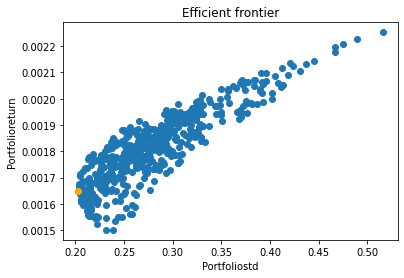

In [23]:
plt.scatter(stds, returns)
plt.scatter(min(stds), returns[stds.index(min(stds))],c="orange")
plt.title("Efficient frontier")
plt.xlabel("Portfoliostd")
plt.ylabel("Portfolioreturn")
plt.show()